# Notebook : classification - prédiction infarctus

## Consignes :

**1. exploration des données**

- extrema et histogramme de chaque variable

- supprimer les données manquantes (on complétera plus tard)

**2. faire tourner plusieurs modèles**

- naive bayes (celui qui tourne le + vite)

- SVM

- XGBoost

- KNN

- random forest

**3. évaluer les performances du modèle :**

- comparer les performances du modèle à la référence dans la biblio

- grid search : faire une courbe avec les performances du 

- analyse qualitative des données : TS-NE

## 1 - Exploration des données

In [1]:
import pandas as pd #data processing library
import numpy as np #linear algebra library
import sklearn #machine learning library

# data visualization libraries
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [2]:
# import du jeu de données
df = pd.read_csv('heart.csv')

In [3]:
# affichage des dimensions du jeu de données
print(df.shape,'\n')

# affichage des noms de colonnes
print(df.columns,'\n')

# affichage des 5 premières lignes du jeu de données
df.head()
display(df.head())

#  affichage des 5 dernières lignes du jeu de données
df.tail()

(918, 12) 

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object') 



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [4]:
# on définit la liste des variables numériques
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# on définit en compréhension la liste des variables catégorielles
categorical_columns = [item for item in df.columns if item not in numerical_columns]

# cholesterol : si valeur supérieure à "seuil" alors "élevé" sinon "normal" dans une autre variable
# seuil = TBD
#df['Cholesterol_cat'] = np.where(df['Cholesterol'] > seuil, 'Elevated', 'Normal')


In [5]:
# on convertit les variables catégorielles qui sont mal représentées
df[categorical_columns] = df[categorical_columns].astype('category')

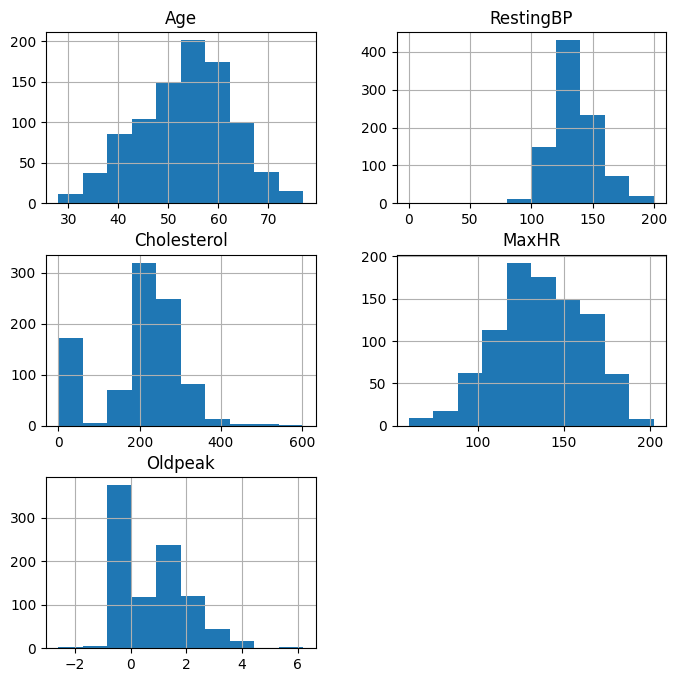

In [6]:
# affiche un histogramme des données numériques du jeu de données
df.hist(figsize=(8,8))
plt.savefig('figures/Exploration/histogramme_numerical_columns.png')
plt.show()

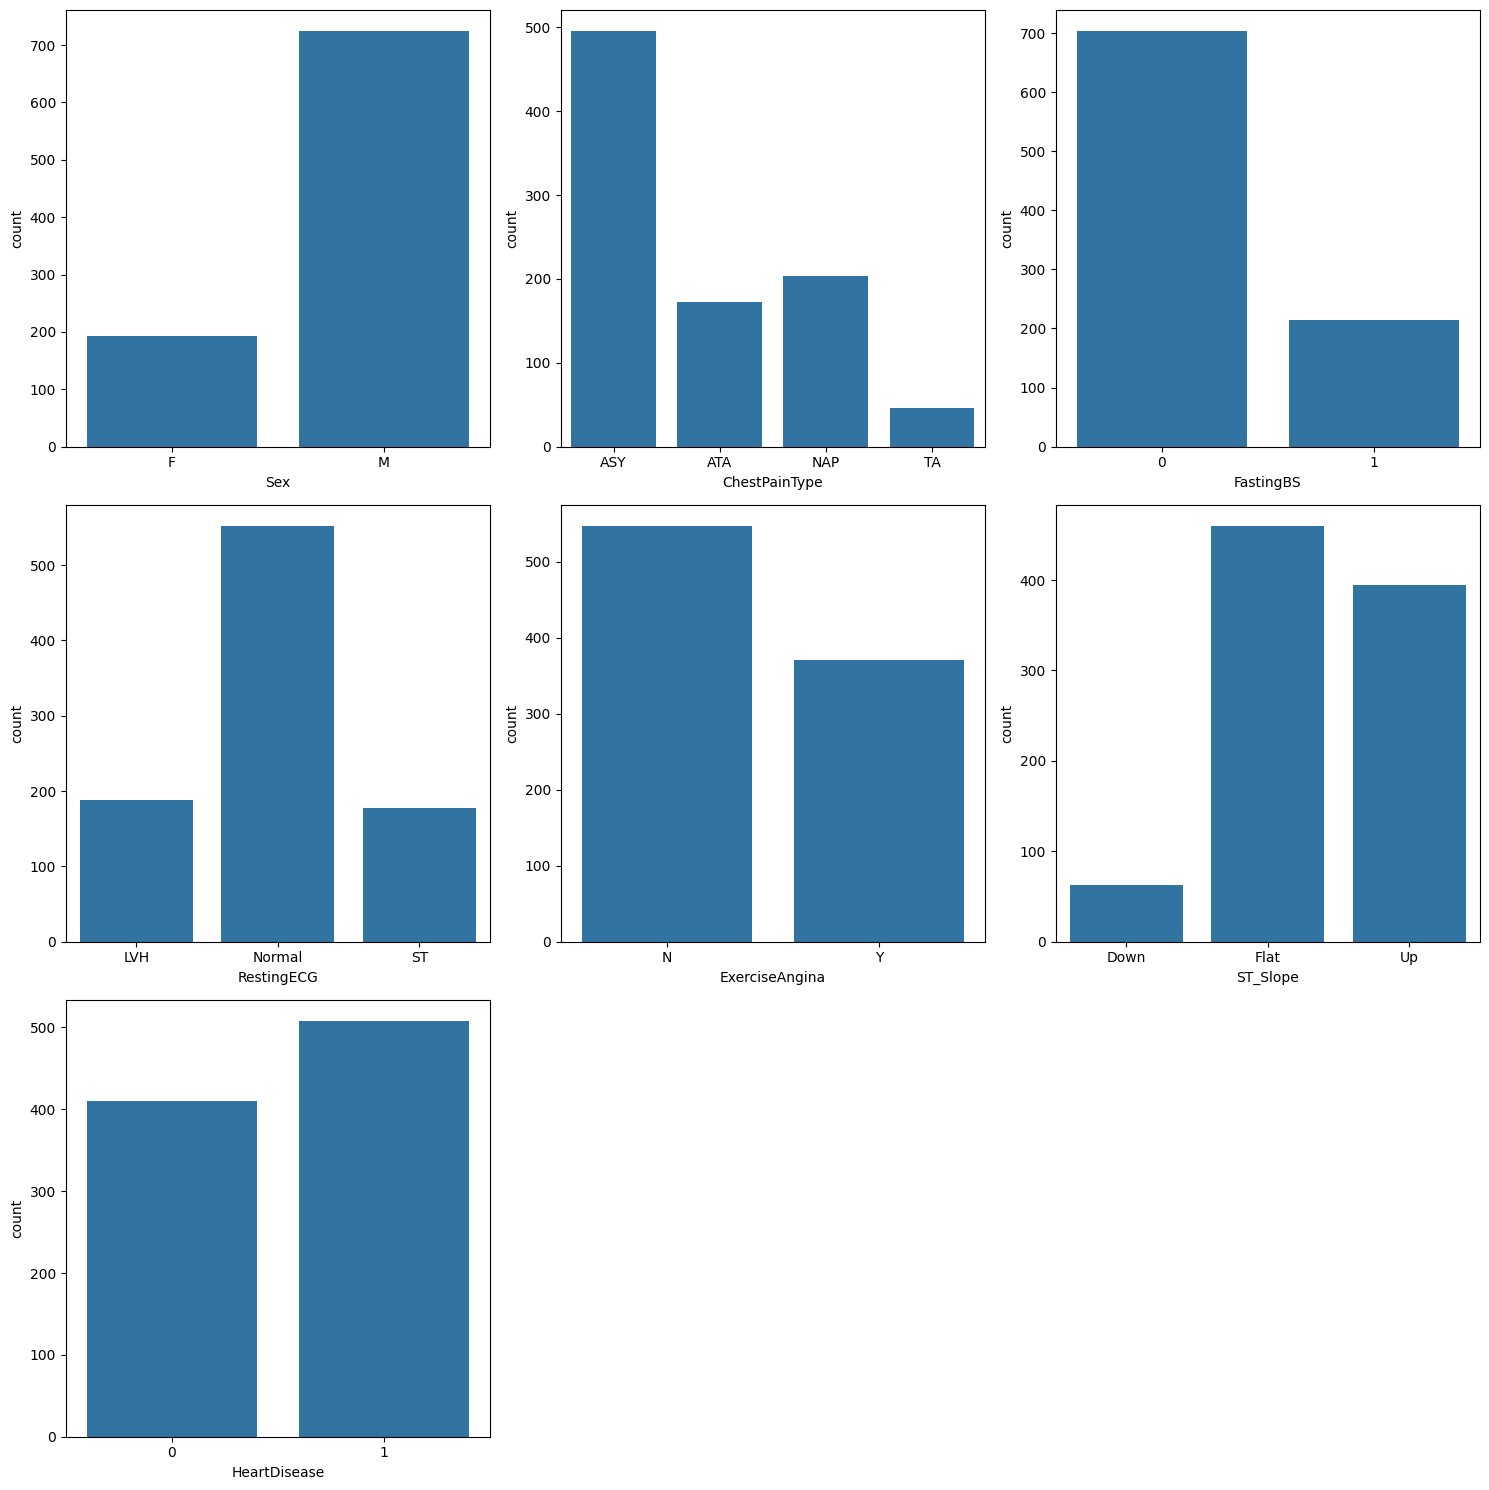

In [7]:
# Pour chaque colonne catégorielle

# Définir le nombre de lignes et de colonnes pour les sous-tracés
n_rows = 3
n_cols = 3

# Créer une figure et des axes pour les sous-tracés
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15,15))

# Aplatir les axes pour faciliter leur itération
axs = axs.ravel()

# Liste des colonnes catégorielles
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

# Pour chaque colonne catégorielle
for i in range(len(axs)):
    if i < len(categorical_columns):
        # Créer un histogramme des données catégorielles sur l'axe correspondant
        sns.countplot(x=categorical_columns[i], data=df, ax=axs[i])
    else:
        # Supprimer les axes vides
        fig.delaxes(axs[i])

# Enregistrer la figure dans le sous-dossier 'figures'
plt.tight_layout()
plt.savefig('figures/Exploration/histogramme_categorical_columns.png')

# Afficher la figure
plt.show()

In [8]:
# afficher les valeurs manquantes
missing_values = df.isnull().sum()

print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
# # normalisation des données
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# affichage des 5 premières lignes du jeu de données
df.head()
display(df.head())

# affichage des 5 dernières lignes du jeu de données
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## 2 - Modèles

In [10]:
# séparer les données en deux groupes : les données d'entrée et les données de sortie
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# one-hot encoding des variables catégorielles
X = pd.get_dummies(X, drop_first=True)

# seed pour la reproductibilité
seed = 42

# séparer les données en ensemble d'apprentissage et ensemble de validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

### 2.1 - Naive Bayes

#### entraînement du modèle

In [11]:
# entrainement d'un classifieur Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# prédiction sur l'ensemble de validation
y_pred_NaiveBayes = model.predict(X_test)

#### évaluation du modèle

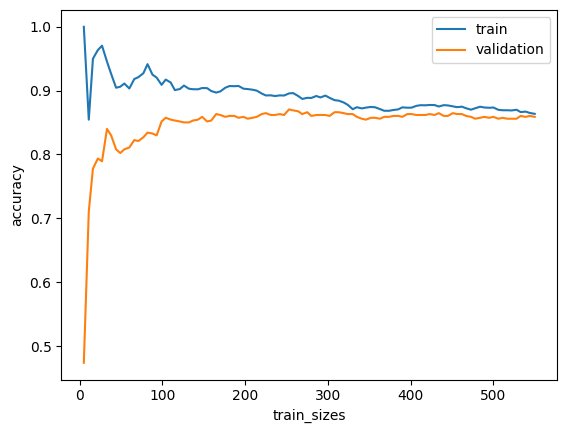

confusion matrix :  
 
 [[ 86  12]
 [ 19 113]] 

précision :  0.8652173913043478


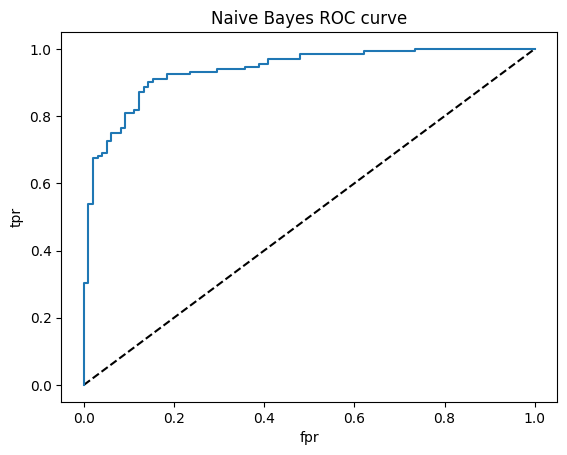

Aire sous la courbe ROC (AUC) :  0.9366883116883117


In [12]:
# courbe performance en apprentissage et en validation
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/NaiveBayes/NaiveBayes_learning_curve.png')
plt.show()

# affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_NaiveBayes)
print("confusion matrix : ",'\n','\n',cm,'\n')

# affichage de la précision
from sklearn.metrics import accuracy_score
print("précision : ",accuracy_score(y_test, y_pred_NaiveBayes))

# affichage de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_proba_NaiveBayes = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_NaiveBayes)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.savefig('figures/NaiveBayes/NaiveBayes_ROC_curve.png')
plt.show()

# affichage de l'aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_NaiveBayes))

### 2.2 - SVM

#### entraînement du modèle

In [13]:
# entrainement d'un classifieur SVM
from sklearn.svm import SVC
model = SVC(probability=True)
model.fit(X_train, y_train)

# prédiction sur l'ensemble de validation
y_pred_SVM = model.predict(X_test)

#### évaluation du modèle

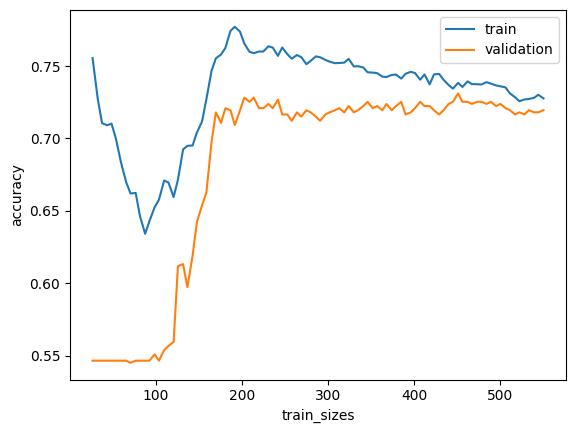

confusion matrix :  
 
 [[69 29]
 [38 94]] 

précision :  0.7086956521739131


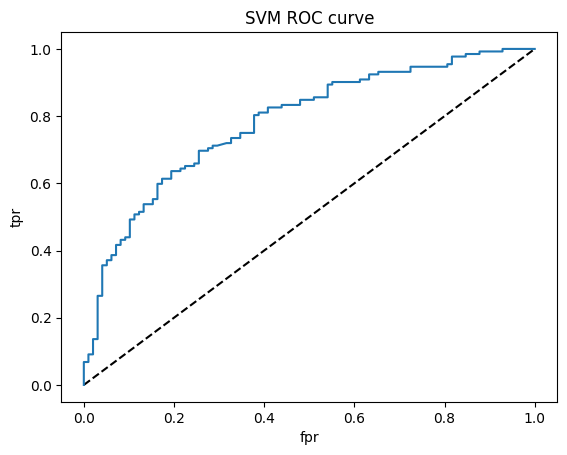

Aire sous la courbe ROC (AUC) :  0.7827767470624614


In [14]:
# courbe performance en apprentissage et en validation
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/SVM/SVM_learning_curve.png')
plt.show()

# affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_SVM)
print("confusion matrix : ",'\n','\n',cm,'\n')

# affichage de la précision
from sklearn.metrics import accuracy_score
print("précision : ",accuracy_score(y_test, y_pred_SVM))

# affichage de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_proba_SVM = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_SVM)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.savefig('figures/SVM/SVM_ROC_curve.png')
plt.show()

# affichage de l'aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_SVM))

### 2.3 - XGBoost

#### entraînement du modèle

In [15]:
# entraînement d'un classifieur XGBoost
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

# prédiction sur l'ensemble de validation
y_pred_XGBoost = model.predict(X_test)

#### évaluation du modèle

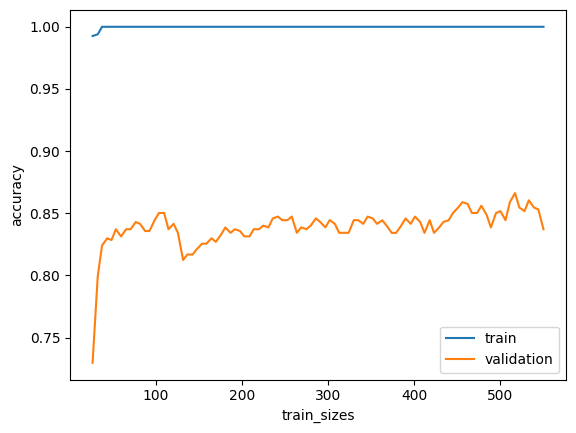

confusion matrix :  
 
 [[ 84  14]
 [ 18 114]] 

précision :  0.8608695652173913


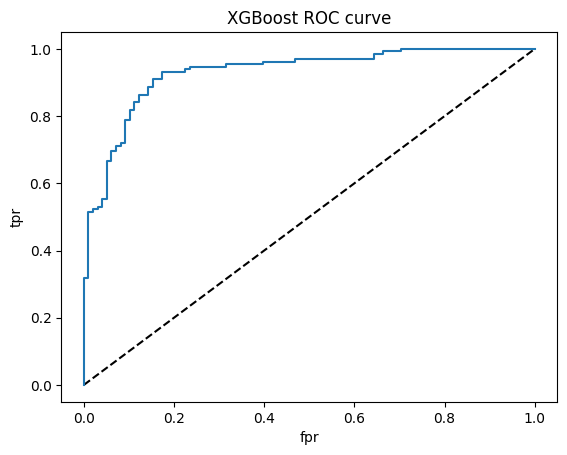

Aire sous la courbe ROC (AUC) :  0.929421768707483


In [16]:
# courbe performance en apprentissage et en validation
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/XGBoost/XGBoost_learning_curve.png')
plt.show()

# affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_XGBoost)
print("confusion matrix : ",'\n','\n',cm,'\n')

# affichage de la précision
from sklearn.metrics import accuracy_score
print("précision : ",accuracy_score(y_test, y_pred_XGBoost))

# affichage de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_proba_XGBoost = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_XGBoost)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBoost ROC curve')
plt.savefig('figures/XGBoost/XGBoost_ROC_curve.png')
plt.show()

# affichage de l'aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_XGBoost))

### 2.4 - KNN

#### entraînement du modèle

In [17]:
# entrainement d'un classifieur KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# prédiction sur l'ensemble de validation
y_pred_KNN = model.predict(X_test)

#### évaluation du modèle

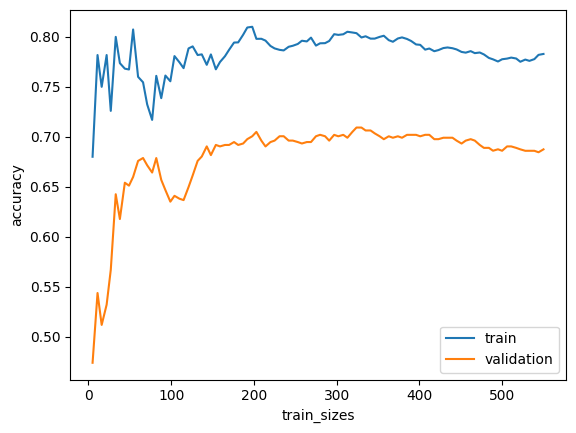

confusion matrix :  
 
 [[69 29]
 [36 96]] 

précision :  0.717391304347826


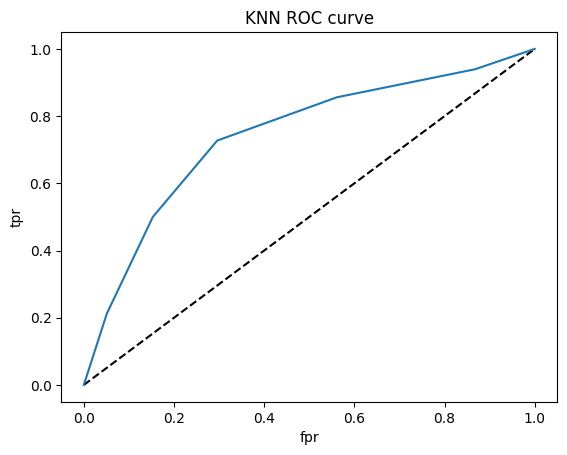

Aire sous la courbe ROC (AUC) :  0.7428880643166358


In [18]:
# courbe performance en apprentissage et en validation
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/KNN/KNN_learning_curve.png')
plt.show()

# affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_KNN)
print("confusion matrix : ",'\n','\n',cm,'\n')

# affichage de la précision
from sklearn.metrics import accuracy_score
print("précision : ",accuracy_score(y_test, y_pred_KNN))

# affichage de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_proba_KNN = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_KNN)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.savefig('figures/KNN/KNN_ROC_curve.png')
plt.show()

# affichage de l'aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_KNN))

### 2.5 - Random forest

#### entraînement du modèle

In [19]:
# entraînement d'un classifieur Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# prédiction sur l'ensemble de validation
y_pred_RandomForest = model.predict(X_test)

#### évaluation du modèle

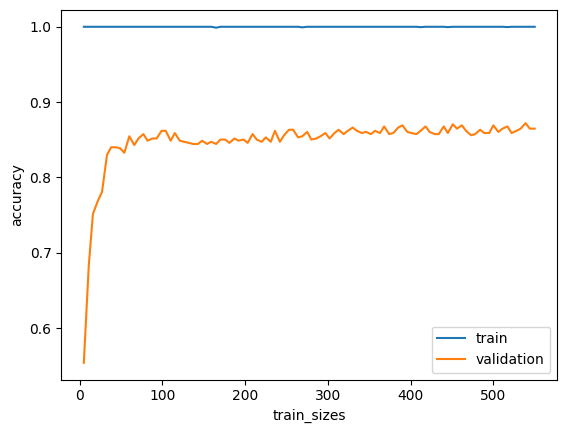

confusion matrix :  
 
 [[ 85  13]
 [ 13 119]] 

précision :  0.8869565217391304


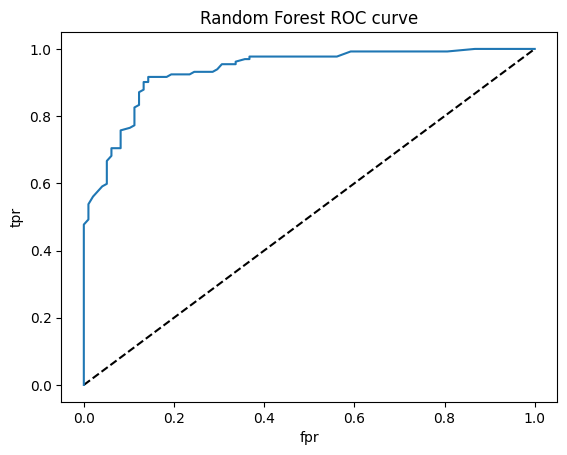

Aire sous la courbe ROC (AUC) :  0.9356060606060606


In [20]:
# courbe de performance en apprentissage et en validation
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 100))
plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('figures/RandomForest/RandomForest_learning_curve.png')
plt.show()

# affichage de la matrice de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_RandomForest)
print("confusion matrix : ",'\n','\n',cm,'\n')

# affichage de la précision
from sklearn.metrics import accuracy_score
print("précision : ",accuracy_score(y_test, y_pred_RandomForest))

# affichage de la courbe ROC
from sklearn.metrics import roc_curve
y_pred_proba_RandomForest = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_RandomForest)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC curve')
plt.savefig('figures/RandomForest/RandomForest_ROC_curve.png')
plt.show()

# affichage de l'aire sous la courbe ROC
from sklearn.metrics import roc_auc_score
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_RandomForest))



## 3 - Optimisation

### 3.1 - Comparaison des modèles

Naive Bayes 0.8589230931979266 0.02751989982765618
SVM 0.7180260234846081 0.01396309971882823
XGBoost 0.840071934835502 0.026267894909039552
KNN 0.6874114037871576 0.03068557600660232
Random Forest 0.8633238125462815 0.019499730494612864


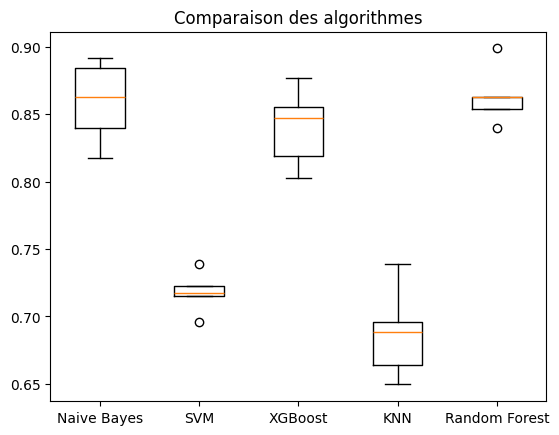

In [24]:

# compare les modèles entre eux
from sklearn.model_selection import cross_val_score
models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGBoost', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
results = []
names = []

# pour chaque modèle
for name, model in models:
    result = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(result)
    names.append(name)
    print(name, result.mean(), result.std())

plt.boxplot(results, labels=names)
plt.title('Comparaison des algorithmes')
plt.savefig('figures/Comparaison/Comparaison.png')
plt.show()

### 3.2 - Optimisation des hyper-paramètres

{'C': 1, 'kernel': 'linear'}
0.8589548291547656
SVC(C=1, kernel='linear', probability=True)


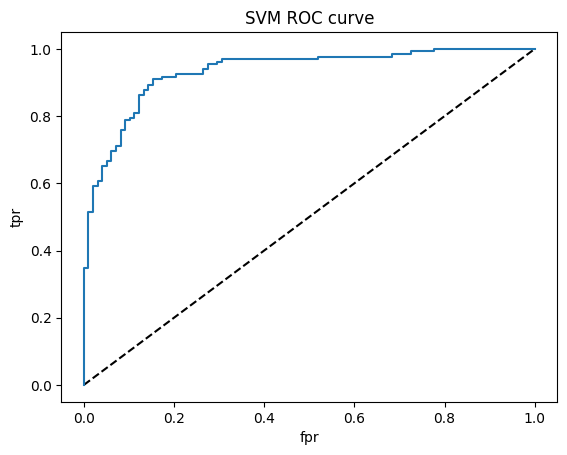

Aire sous la courbe ROC (AUC) :  0.9326685219542362


In [25]:
# grid search pour le modèle SVM
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = SVC(probability=True)
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)
y_pred_SVM = clf.predict(X_test)
y_pred_proba_SVM = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_SVM)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='SVM')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM ROC curve')
plt.savefig('figures/SVM/SVM_ROC_curve_grid_search.png')
plt.show()
print("Aire sous la courbe ROC (AUC) : ",roc_auc_score(y_test, y_pred_proba_SVM))